In [1]:
# Sports Team Simulation
# Baseball
# Based on Miller (2015)

import numpy as np
import random
from scipy.stats import nbinom
from array import array

#import pyprind   # PROVIDES TIMING AWARENESS


In [2]:
def simulator(home_mean, away_mean, niterations):
    # estimates probability of home team win
    seed(1234)  # set to obtain reproducible results
    home_game_score = [0] * niterations
    away_game_score = [0] * niterations
    home_win = [0] * niterations
    i = 0
    while (i < niterations):
        home_game_score[i] = \
            nbinom.rvs(n = 4.0, p = 4.0/(4.0 + home_mean), size = 1)[0] 
        away_game_score[i] = \
            nbinom.rvs(n = 4.0, p = 4.0/(4.0 + away_mean), size = 1)[0]         
        if (home_game_score[i] > away_game_score[i]):
            home_win[i] = 1
        if ((away_game_score[i] > home_game_score[i]) or \
            (away_game_score[i] < home_game_score[i])):
            i = i + 1 
    n_home_win = sum(home_win)
    return n_home_win / niterations      

In [11]:
# NOT USED FOR IN CLASS DEMO

# pbar = pyprind.ProgBar(50000)

#niterations = 100  # use smaller number for testing
# probability matrix for results... home team rows, away team columns
#probmat = array([[0] * 9] * 9)

# matrix representation of home and away team runs for table
#homemat = array([[9] * 9, [8] * 9, [7] * 9, [6] * 9, [5] * 9,\
#    [4] * 9, [3] * 9, [2] *9, [1] * 9])
#awayrow = array([1, 2, 3, 4, 5, 6, 7, 8, 9])    
#awaymat = array([awayrow] * 9)

# generate table of probabilities
#for index_home in range(9):
#    for index_away in range(9):
#        if (homemat[index_home,index_away] != awaymat[index_home,index_away]):
#            print(index_home, index_away)
#            probmat[index_home, index_away] = \
#                simulator(float(homemat[index_home, index_away]), \
#                          float(awaymat[index_home, index_away]), niterations)
#                           #pbar.update()

#print(probmat)                

In [4]:
# estimates probability of home team win
random.seed(1234)  # set to obtain reproducible results

niterations = 100000  # use smaller number for testing

home_game_score = [0] * niterations
away_game_score = [0] * niterations
home_mean = 5.97
away_mean = 4.97
i = 0
while (i < niterations):
    home_game_score[i] = \
        nbinom.rvs(n = 4.0, p = 4.0/(4.0 + home_mean), size = 1)[0] 
    away_game_score[i] = \
        nbinom.rvs(n = 4.0, p = 4.0/(4.0 + away_mean), size = 1)[0]         
    i = i + 1 

np.mean(home_game_score)
    


5.9488200000000004

In [10]:
np.mean(away_game_score)


4.4699999999999998

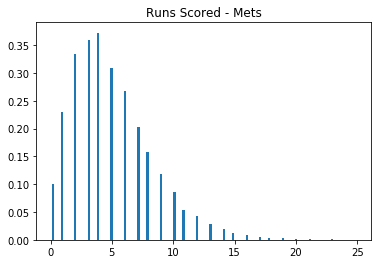

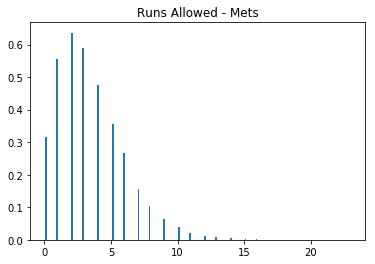

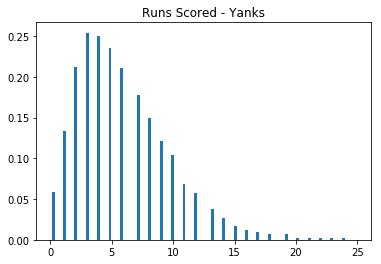

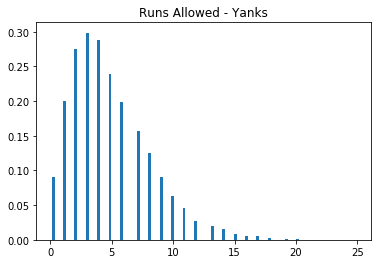

In [5]:
#  BUILD PLOTS FOR Negative Binomial MODEL
import seaborn as sns

import matplotlib.pyplot as plt

mas = 4 / (4+4.97)
mad = 4 / (4 + 3.45)
yhs = 4 / (4 + 5.97)
yhd = 4 / (4 + 4.84)

MetAwayScore = np.random.negative_binomial(4, mas, 10000)
MetAwayDefend = np.random.negative_binomial(4, mad, 10000)
YankHomeScore = np.random.negative_binomial(4, yhs, 10000)
YankHomeDefend = np.random.negative_binomial(4, yhd, 10000)

plt.hist(MetAwayScore, bins='auto', rwidth = .5, normed=True)
plt.title("Runs Scored - Mets")
plt.show()

plt.hist(MetAwayDefend, bins='auto', rwidth = .5, normed=True) 
plt.title("Runs Allowed - Mets")
plt.show()

plt.hist(YankHomeScore, bins='auto', rwidth = .5, normed=True) 
plt.title("Runs Scored - Yanks")
plt.show()

plt.hist(YankHomeDefend, bins='auto', rwidth = .5, normed=True)
plt.title("Runs Allowed - Yanks")
plt.show()

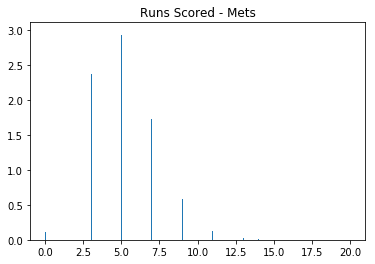

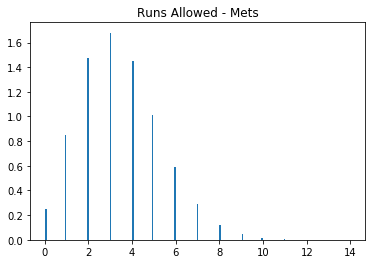

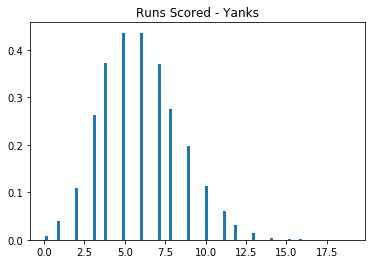

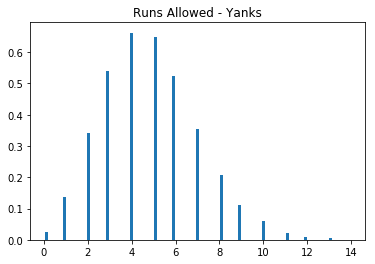

In [6]:
#  BUILD PLOTS FOR Poisson MODEL

MetAwayScore = np.random.poisson(4.97, 1000000)
MetAwayDefend = np.random.poisson(3.45, 100000)
YankHomeScore = np.random.poisson(5.97, 10000)
YankHomeDefend = np.random.poisson(4.84, 10000)

plt.hist(MetAwayScore, bins='auto', rwidth = .5, normed=True) 
plt.title("Runs Scored - Mets")
plt.show()

plt.hist(MetAwayDefend, bins='auto', rwidth = .5, normed=True)  
plt.title("Runs Allowed - Mets")
plt.show()

plt.hist(YankHomeScore, bins='auto', rwidth = .5, normed=True)  
plt.title("Runs Scored - Yanks")
plt.show()

plt.hist(YankHomeDefend, bins='auto', rwidth = .5, normed=True) 
plt.title("Runs Allowed - Yanks")
plt.show()

In [26]:
# Suggestion for the student: Develop simulators for football or basketball.
# Use matplotlib to create a probability heat-map for the probmat results.

